# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [2]:
image = imread('data/image.jpg')


Analizala

In [3]:
print(f"Forma: {image.shape}")
print(f"Tamaño: {image.size}")

Forma: (630, 1200, 3)
Tamaño: 2268000


Muestra la imagen para ver que se ha cargado bien

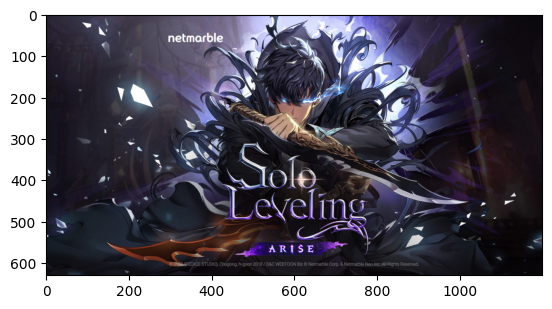

In [4]:
plt.imshow(image);

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [5]:
X = image.reshape(-1,3)
X.shape

(756000, 3)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [6]:
kmeans = KMeans(n_clusters=3, random_state=20).fit(X)

/Users/administrador/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizas para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [7]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [8]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [9]:
segmented_img = segmented_img.reshape(image.shape)
segmented_img = segmented_img / 255

#### 7. Imprime y guarda en tu ordenador la imagen resultante

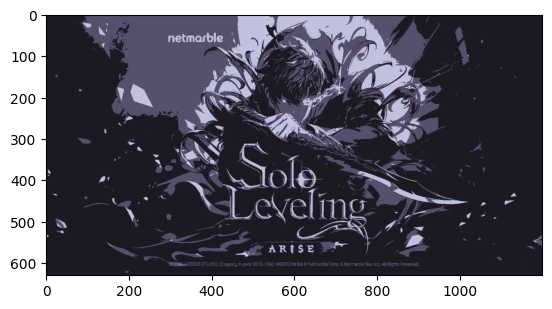

In [10]:
plt.imshow(segmented_img);
plt.savefig('images/EJER_1_result.png')

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [11]:
def plot_clusters(image, colors, show=True, dir_save=""):
    image = imread(image)
    X = image.reshape(-1,3)
    kmeans = KMeans(n_clusters=colors, random_state=20).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    segmented_img = segmented_img / 255
    if show:
        plt.imshow(segmented_img);
    if dir_save != "":
        plt.savefig(dir_save)

/Users/administrador/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


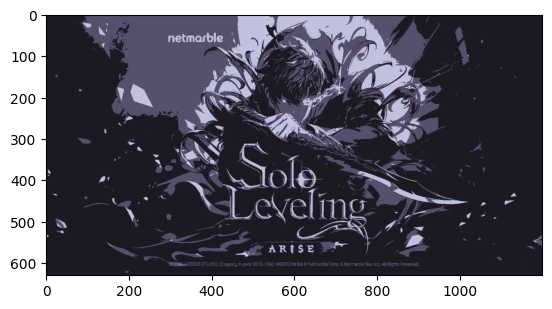

In [12]:
plot_clusters('data/image.jpg', 3, True, 'images/EJER_1_result.png')